In [1]:
# 1.--- load dictionary and stop_words 
import jieba
jieba.set_dictionary('C:/Users/doudi/Downloads/dict.txt.big')

# load stop word file
stw=[]
with open('C:/Users/doudi/Downloads/chineses_stop_word.txt', 'r') as file:
    for data in file.readlines():
        data = data.strip()
        stw.append(data)

In [2]:
# 2.--- read file and segmentation and remove stop_words
import re
def Cleaning(line):
    r = re.compile(u'[^\u4e00-\u9fa5]')
    line = r.sub(r'',line)
    
    return line
# load data by "each article"
files = []
with open('C:/Users/doudi/Downloads/ChineseDataset_Assignment1.txt', 'r', encoding='utf-8') as file:
    for l in file: 
        l = l.strip()
        l = Cleaning(l)
        files.append(l)
corpus = []
for s in files:
    seg = jieba.cut(s, cut_all=False)
    seg_result = list(filter(lambda a: a not in stw, seg))
    corpus.append(seg_result)

Building prefix dict from C:\Users\doudi\Downloads\dict.txt.big ...
Loading model from cache C:\Users\doudi\AppData\Local\Temp\jieba.u1543b5a6a86026474ad700c73b7e6fac.cache
Loading model cost 1.099 seconds.
Prefix dict has been built succesfully.


In [3]:
# 3.--- calculate tf
# split all terms together to calculate global tf
split_corpus = []
for item in corpus:
    for word in item:
        split_corpus.append(word)

# use collection.counter to zip words and counts as dict
from collections import Counter
c = Counter()
for x in split_corpus:
    if len(x)>1 and x != '\r\n':
        c[x] += 1
# output ranking 30
for (k,v) in c.most_common(30):
    print("%s:%d"%(k,v))

# sort the dict by value
import operator
tf = sorted(c.items(), key=operator.itemgetter(1), reverse=True)

林書豪:12592
尼克:8807
台北:6419
學校:6042
政府:5141
美國:5009
比賽:4973
總統:4907
大學:4666
立委:4432
老師:4262
民進黨:4253
教育:4156
不過:4072
孩子:3791
中國:3668
國民黨:3668
時間:3447
一個:3393
校長:3382
高中:3363
最後:3332
家長:3316
參加:3312
活動:3252
進行:3242
表現:3199
未來:3150
中央社:3018
球員:3009


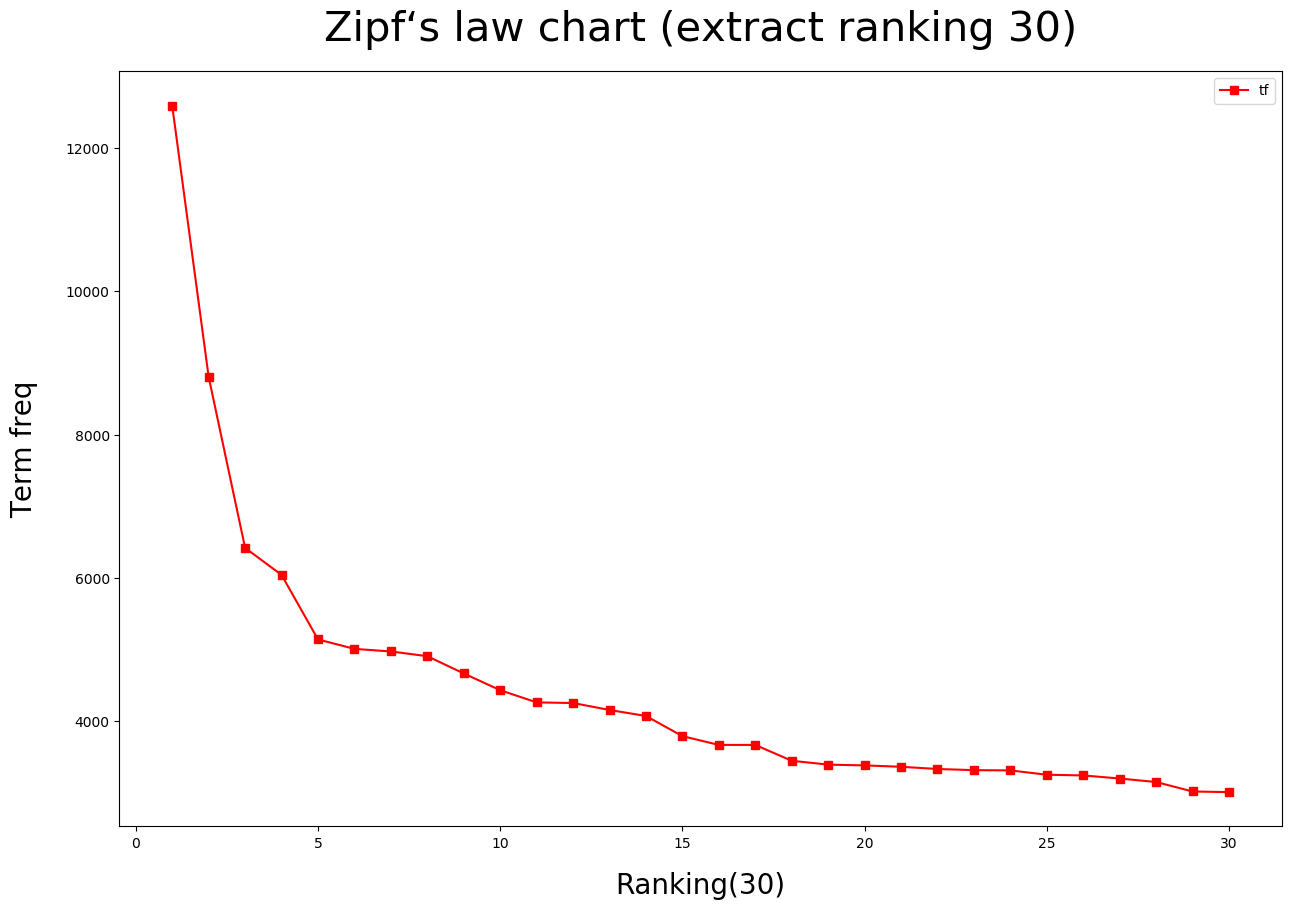

In [26]:
# 4. --- plot the Zipf's graph (ranking 30)
ext30_tf = tf[0:30]

import matplotlib.pyplot as plt

x = list(range(1,31))
y = []

n = 1 
temp = [m[n] for m in ext30_tf]


for i in range(len(temp)):
    y.append(temp[i])
#    y.append((temp[i]/sum(temp)))

plt.figure(figsize=(15,10),dpi=100,linewidth = 2)

plt.plot(x,y,'s-',color = 'r',label='tf')

plt.title("Zipf‘s law chart (extract ranking 30)",fontsize=30, x=0.5, y=1.03)

plt.xlabel("Ranking(30)", fontsize=20, labelpad = 15)
plt.ylabel("Term freq", fontsize=20, labelpad = 20)
plt.legend(loc = "best", fontsize=10)

plt.savefig('C:/Users/doudi/OneDrive/Documents/TMU-GIDS/機器學習與深度學習/第一次作業/Zipf‘s.png')
plt.show()



In [5]:
# 5. --- calculate idf
# unzip terms only from tf tuple-list
res = [[ i for i, j in tf ], [ j for i, j in tf ]] 
tf_word = res[0]# word ordering by tf value
tf_val = res[1]# tf value decs

# use tf words' ordering to calculate corresponding idf
df = []
for word in tf_word:
    count = 0
    for sentence in corpus:
        if word in sentence:
            count += 1 
    df.append(count)    
from math import log
idf = []
for y in df:
    N = len(corpus)
    idf_temp = log((N/y),10)
    idf.append(idf_temp)

In [6]:
# 6. --- calculate tfidf and sorting
# output tfidf by multiply tf and idf in same ordering
tfidf_val = [a*b for a,b in zip(tf_val,idf)]
tfidf = dict(zip(tf_word,tfidf_val))
# sort tfidf by the value
tfidf_ans = sorted(tfidf.items(), key=operator.itemgetter(1), reverse=True)

split_ans = [[i for i, j in tfidf_ans], [j for i, j in tfidf_ans]] 
tfidf_ans_word = split_ans[0]# word ordering by g-tfidf value
tfidf_ans_val = split_ans[1]# g-tfidf value desc

In [7]:
tfidf_ans[0:30]

[('林書豪', 10399.01808716536),
 ('尼克', 8191.2617213057965),
 ('學校', 4838.394452905263),
 ('總統', 4537.485279039435),
 ('民進黨', 4346.445782744916),
 ('立委', 4328.3370454648175),
 ('大學', 4321.460238298655),
 ('政府', 4205.163071198006),
 ('老師', 4194.156062205371),
 ('孩子', 4108.388431786091),
 ('教育', 3997.1467149396053),
 ('美國', 3996.5564225127687),
 ('中國', 3900.867592587419),
 ('國民黨', 3857.221241524091),
 ('比賽', 3782.548793276673),
 ('教師', 3736.6893802718714),
 ('校長', 3617.2532904990194),
 ('高中', 3610.710351997922),
 ('家長', 3588.9713875788507),
 ('教育部', 3319.8829223849393),
 ('台北', 3215.0396320645395),
 ('考生', 3169.7328807941335),
 ('大陸', 3155.3326966086593),
 ('活動', 3113.9713114849264),
 ('球員', 2927.93264147128),
 ('不過', 2837.9723011058218),
 ('參加', 2819.147115755154),
 ('安東尼', 2815.7873054778493),
 ('市長', 2809.06325062206),
 ('一個', 2776.6511466389115)]

In [10]:
# 7. --- save the answer as file
import pandas as pd
tfidf_ans_df = pd.DataFrame({'Terms': tfidf_ans_word,'G-TfIdf': tfidf_ans_val})
tfidf_ans_df.to_csv('C:/Users/doudi/OneDrive/Documents/TMU-GIDS/機器學習與深度學習/第一次作業/Global_TfIdf.csv',encoding='utf-8-sig',index=0)